# Rapid Refresh Model Plotting 

This notebook gives several examples of plotting QG analyses using RAP analyses

In [2]:
#Required Libraries
from datetime import datetime, timedelta

from model_functions import *

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.colors

import metpy
from metpy.plots import StationPlot
from metpy.units import units
import metpy.calc as mpcalc

import numpy as np

from netCDF4 import Dataset, num2date

from scipy.ndimage import gaussian_filter

from xarray.backends import NetCDF4DataStore
import xarray as xr

import pandas as pd

/research/modules/mpich/miniconda3/lib/python3.9/site-packages/setuptools_scm/_integration/setuptools.py:30: RuntimeWarning: 
ERROR: setuptools==52.0.0.post20210125 is used in combination with setuptools_scm>=8.x

Your build configuration is incomplete and previously worked by accident!
setuptools_scm requires setuptools>=61

Suggested workaround if applicable:
 - migrating from the deprecated setup_requires mechanism to pep517/518
   and using a pyproject.toml to declare build dependencies
   which are reliably pre-installed before running the build tools

  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
#set time to plot (no leading zeros)
start_year  = 2021
start_month = 12
start_day   = 11
start_hour  = 0
start_min   = 0
    
#location to plot
#location = True
location_lat = 37.5
location_lon = -98.5J
#    OR
#analysis bounds
location = False
lat_min = 40
lat_max = 50
lon_min = -105
lon_max = -85

cross_section_start = [43.83,-91.25]
cross_section_end = [46.36,-94.23]

In [4]:
dt = datetime(start_year,start_month,start_day,start_hour)
ncss = get_rap_dataset(dt)
print(ncss)

In [5]:
query = ncss.query()
#query.lonlat_box(north=lat_max,south=lat_min,east=lon_max,west=lon_min)
query.all_times()
query.add_lonlat()
query.accept('netcdf')
query.variables('Geopotential_height_isobaric',
                    'Relative_humidity_isobaric',
                    'u-component_of_wind_isobaric',
                    'u-component_of_wind_height_above_ground',
                    'v-component_of_wind_isobaric',
                    'v-component_of_wind_height_above_ground',
                    'Temperature_isobaric',
                    'MSLP_MAPS_System_Reduction_msl',
                    'Convective_available_potential_energy_surface',
                    'Convective_inhibition_surface',
                    'Absolute_vorticity_isobaric',
                    'Potential_temperature_height_above_ground',
                    'Simulated_Brightness_Temperature_for_GOES_12_Channel_4_atmosphere_top')

data = ncss.get_data(query)
ds = xr.open_dataset(NetCDF4DataStore(data)).metpy.parse_cf()


/research/modules/mpich/miniconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfradial1' loading failed:
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/h5py/defs.cpython-39-x86_64-linux-gnu.so: undefined symbol: H5Pget_fapl_direct
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'furuno' loading failed:
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/h5py/defs.cpython-39-x86_64-linux-gnu.so: undefined symbol: H5Pget_fapl_direct
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'gamic' loading failed:
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/h5py/defs.cpython-39-x86_64-linux-gnu.so: undefined symbol: H5Pget_fapl_direc

In [6]:
lon = ds.lon
lat = ds.lat
analysis_time = ds.Temperature_isobaric[0].metpy.time

hght = units('meters') * ds.Geopotential_height_isobaric
temp = units('degK') * ds.Temperature_isobaric
rh = units('percent') * ds.Relative_humidity_isobaric
goes = ds['Simulated_Brightness_Temperature_for_GOES_12_Channel_4_atmosphere_top'][0]

dwpt = mpcalc.dewpoint_from_relative_humidity(temp,rh)
dwpt_sat = mpcalc.dewpoint_from_relative_humidity(temp,np.zeros(temp.shape)*100)

hght_900 = units('meters') * ds.Geopotential_height_isobaric.metpy.sel(
                            vertical=900*units.hPa, time=analysis_time)
hght_850 = units('meters') * ds.Geopotential_height_isobaric.metpy.sel(
                            vertical=850*units.hPa, time=analysis_time)
hght_700 = units('meters') * ds.Geopotential_height_isobaric.metpy.sel(
                            vertical=700*units.hPa, time=analysis_time)
hght_500 = units('meters') * ds.Geopotential_height_isobaric.metpy.sel(
                            vertical=500*units.hPa, time=analysis_time)
hght_300 = units('meters') * ds.Geopotential_height_isobaric.metpy.sel(
                            vertical=300*units.hPa, time=analysis_time)
hght_200 = units('meters') * ds.Geopotential_height_isobaric.metpy.sel(
                            vertical=200*units.hPa, time=analysis_time)

temp_900 = units('degK') * ds.Temperature_isobaric.metpy.sel(
                            vertical=900*units.hPa, time=analysis_time)
temp_850 = units('degK') * ds.Temperature_isobaric.metpy.sel(
                            vertical=850*units.hPa, time=analysis_time)
temp_700 = units('degK') * ds.Temperature_isobaric.metpy.sel(
                            vertical=700*units.hPa, time=analysis_time)
temp_500 = units('degK') * ds.Temperature_isobaric.metpy.sel(
                            vertical=500*units.hPa, time=analysis_time)
temp_300 = units('degK') * ds.Temperature_isobaric.metpy.sel(
                            vertical=300*units.hPa, time=analysis_time)
temp_200 = units('degK') * ds.Temperature_isobaric.metpy.sel(
                            vertical=200*units.hPa, time=analysis_time)

u_900 = units('m/s') * ds['u-component_of_wind_isobaric'].metpy.sel(
                            vertical=900*units.hPa, time=analysis_time)
u_850 = units('m/s') * ds['u-component_of_wind_isobaric'].metpy.sel(
                            vertical=850*units.hPa, time=analysis_time)
u_700 = units('m/s') * ds['u-component_of_wind_isobaric'].metpy.sel(
                            vertical=700*units.hPa, time=analysis_time)
u_500 = units('m/s') * ds['u-component_of_wind_isobaric'].metpy.sel(
                            vertical=500*units.hPa, time=analysis_time)
u_300 = units('m/s') * ds['u-component_of_wind_isobaric'].metpy.sel(
                            vertical=300*units.hPa, time=analysis_time)
u_200 = units('m/s') * ds['u-component_of_wind_isobaric'].metpy.sel(
                            vertical=200*units.hPa, time=analysis_time)

v_900 = units('m/s') * ds['v-component_of_wind_isobaric'].metpy.sel(
                            vertical=900*units.hPa, time=analysis_time)
v_850 = units('m/s') * ds['v-component_of_wind_isobaric'].metpy.sel(
                            vertical=850*units.hPa, time=analysis_time)
v_700 = units('m/s') * ds['v-component_of_wind_isobaric'].metpy.sel(
                            vertical=700*units.hPa, time=analysis_time)
v_500 = units('m/s') * ds['v-component_of_wind_isobaric'].metpy.sel(
                            vertical=500*units.hPa, time=analysis_time)
v_300 = units('m/s') * ds['v-component_of_wind_isobaric'].metpy.sel(
                            vertical=300*units.hPa, time=analysis_time)
v_200 = units('m/s') * ds['v-component_of_wind_isobaric'].metpy.sel(
                            vertical=200*units.hPa, time=analysis_time)

/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/calc/thermo.py:1384: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/calc/thermo.py:1385: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


### Equivalent Potential Vorticity ###

In [7]:
#geostophic wind
ug,vg = mpcalc.geostrophic_wind(hght,latitude=ds.lat,longitude=ds.lon,
                                crs=ccrs.PlateCarree())


theta_e = mpcalc.equivalent_potential_temperature(temp.isobaric,temp,dwpt)
theta_es = mpcalc.equivalent_potential_temperature(temp.isobaric,temp,dwpt_sat)
#get cross section
ug_cs = metpy.interpolate.cross_section(ug, cross_section_start, cross_section_end, steps=101)
vg_cs = metpy.interpolate.cross_section(vg, cross_section_start, cross_section_end, steps=101)
hght_cs = metpy.interpolate.cross_section(hght, cross_section_start, cross_section_end, steps=101)
lat_cs = metpy.interpolate.cross_section(lat,cross_section_start,cross_section_end, steps=101)
lon_cs = metpy.interpolate.cross_section(lon,cross_section_start,cross_section_end, steps=101)
theta_e_cs = metpy.interpolate.cross_section(theta_e,cross_section_start,cross_section_end, steps=101)

Mg = mpcalc.absolute_momentum(ug_cs,vg_cs)

/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/xarray.py:460: UserWarning: Latitude and longitude computed on-demand, which may be an expensive operation. To avoid repeating this computation, assign these coordinates ahead of time with .metpy.assign_latitude_longitude().
  warnings.warn(


/research/modules/mpich/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


[43.83, -91.25]
[46.36, -94.23]


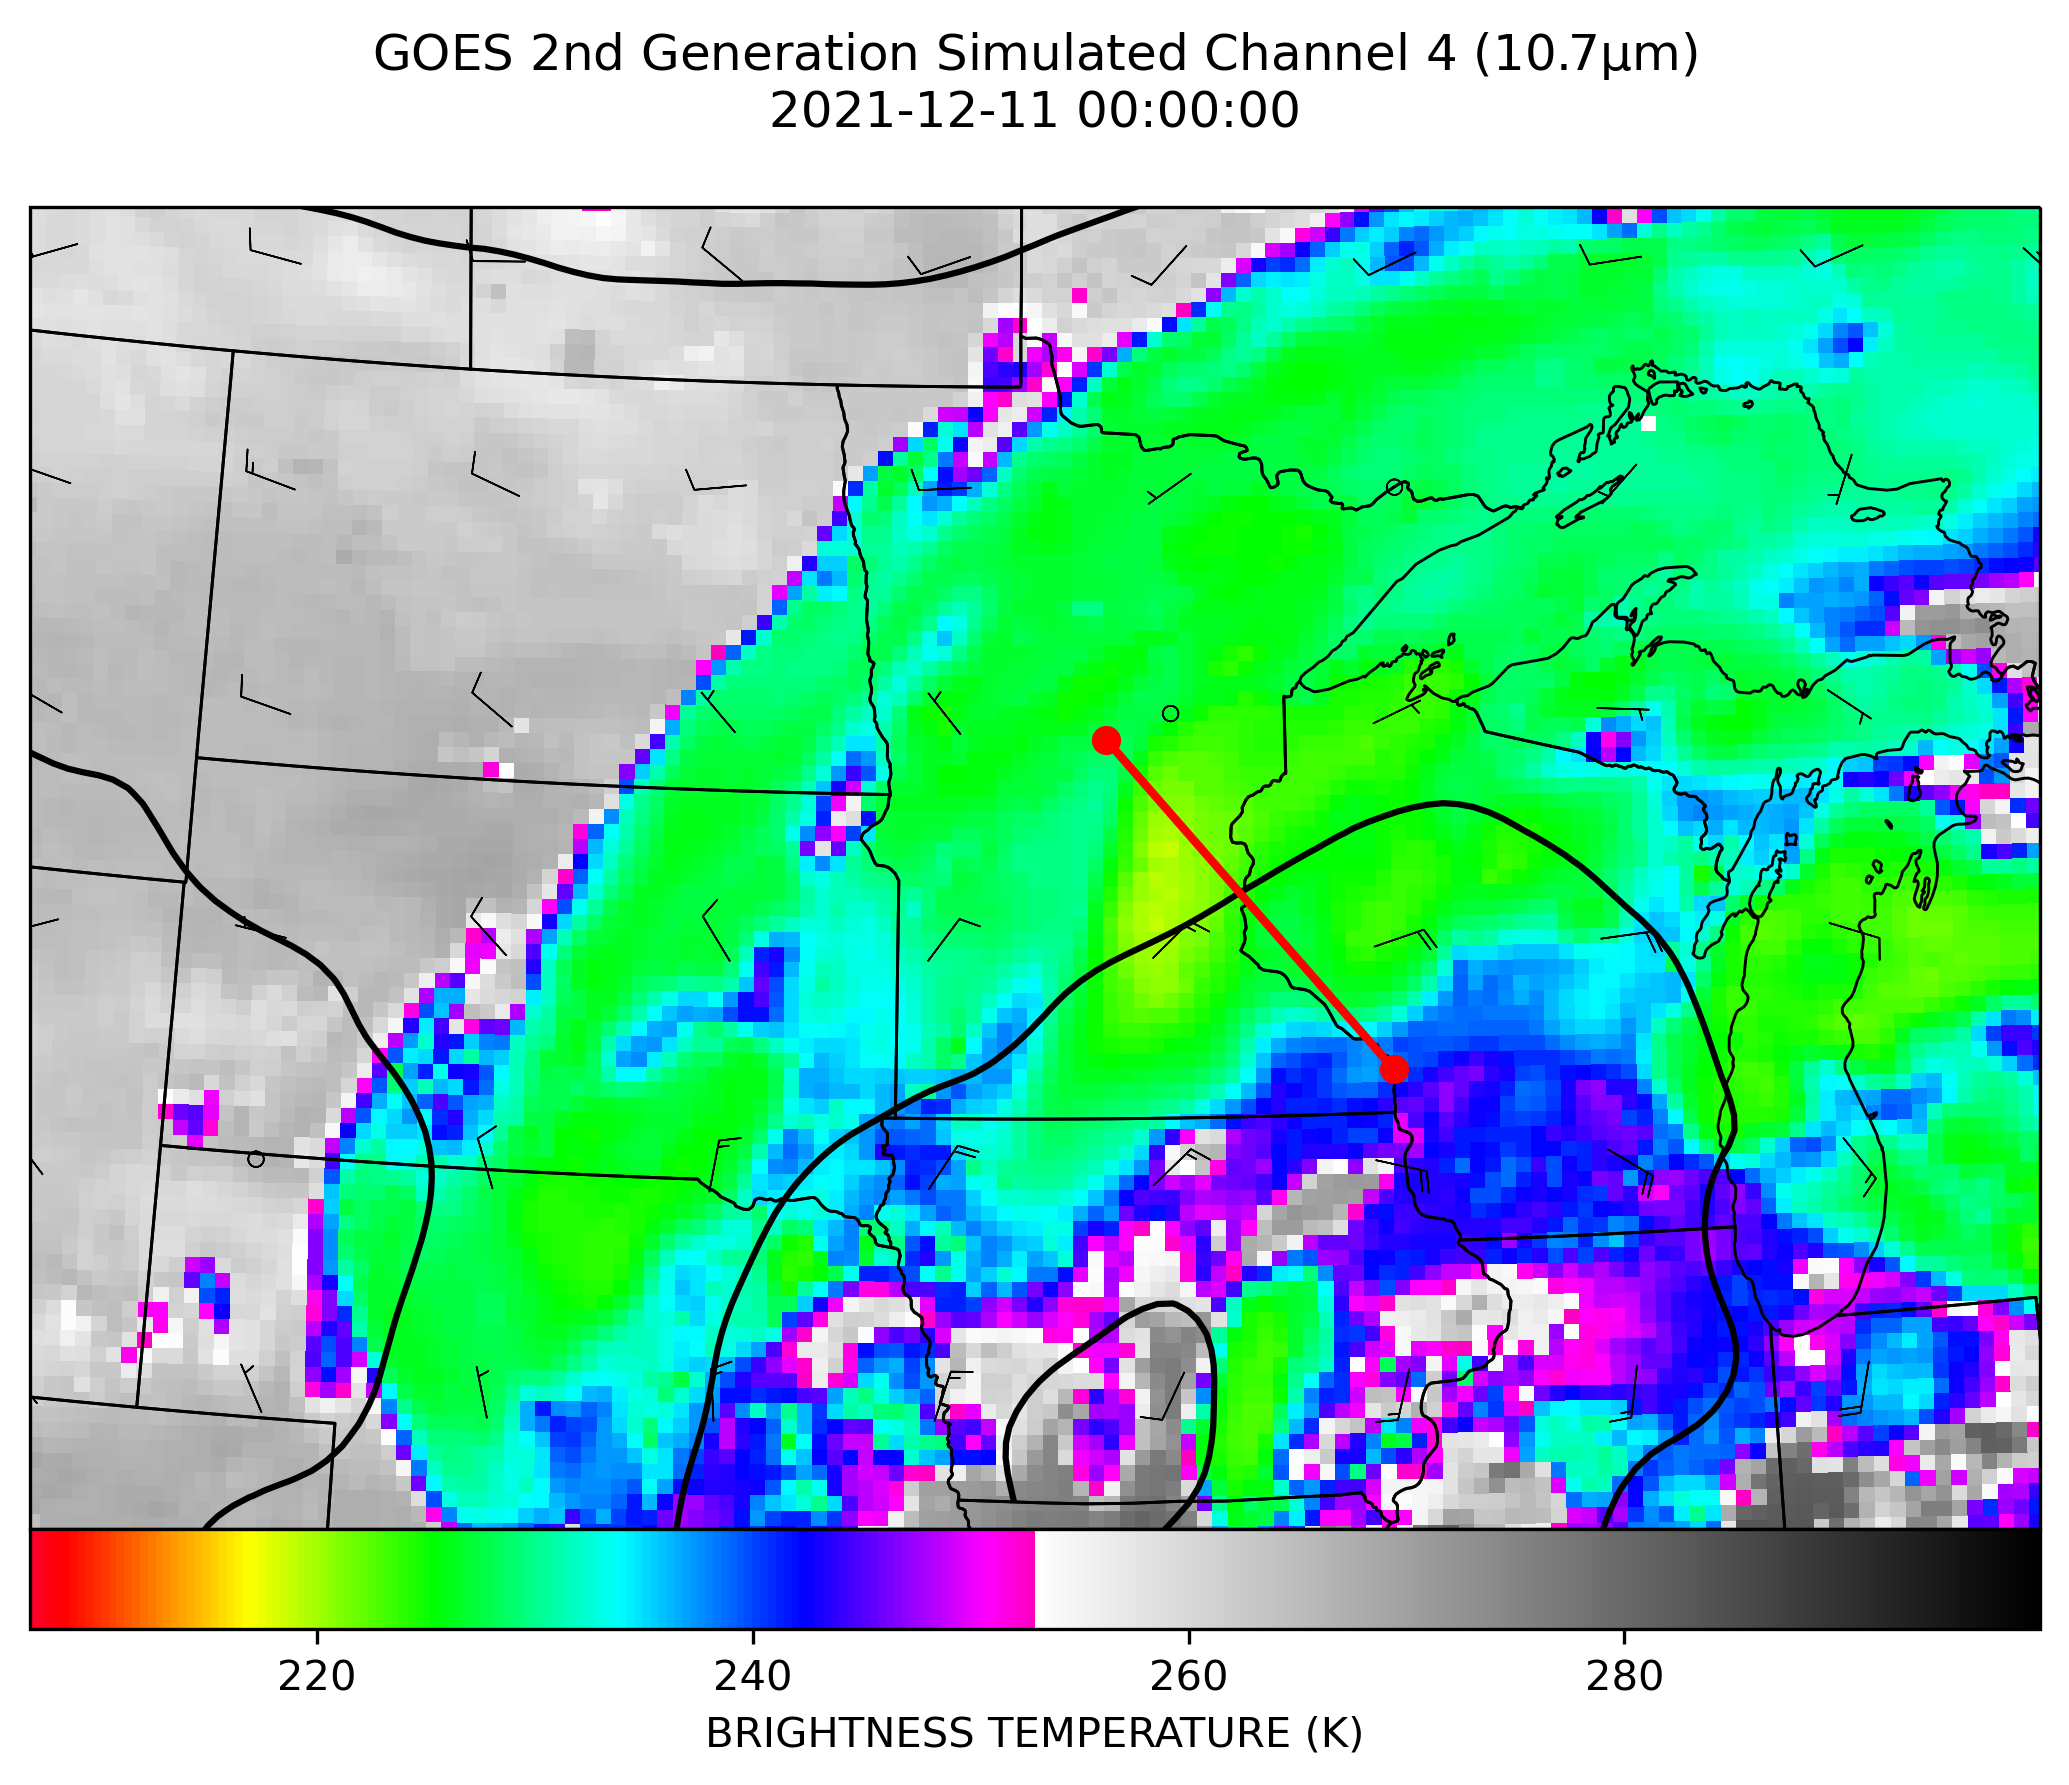

In [14]:
#500mb DVA Chart
proj = ccrs.LambertConformal(central_longitude=-95,central_latitude=35,standard_parallels=[35])

fig = plt.figure(figsize=(7,7),dpi=300)
ax = fig.add_subplot(1,1,1,projection=proj)
cs = ax.contour(ds.lon,ds.lat,hght_900,np.arange(0,8000,60),
                colors='black',transform=ccrs.PlateCarree())
plt.clabel(cs, fontsize=6, inline=1, inline_spacing=0,
             fmt=lambda x: f'{x:.0f}'[:3], rightside_up=True, use_clabeltext=True)

c1 = plt.cm.gist_rainbow(np.arange(0,256,1))
c2 = plt.cm.gist_gray_r(np.arange(0,256,1))
colors = np.vstack((c1, c2))
bt = matplotlib.colors.LinearSegmentedColormap.from_list('bt', colors)
sat = plt.pcolormesh(lon,lat,goes,cmap=bt,transform=ccrs.PlateCarree())
cbar = plt.colorbar(sat,orientation='horizontal',pad=0.0,extendrect=True)
cbar.set_label(r'BRIGHTNESS TEMPERATURE (K)')

wind_slice = (slice(None,None,15),slice(None,None,15))
wb = ax.barbs(ds.lon[wind_slice].values,ds.lat[wind_slice].values,
            u_900[wind_slice].values,
            v_900[wind_slice].values,
            length=5,lw=0.4,pivot='middle',color='black',transform=ccrs.PlateCarree())
print(cross_section_start)
print(cross_section_end)
ax.plot([cross_section_start[1],cross_section_end[1]],
        [cross_section_start[0],cross_section_end[0]],
        marker='o',color='r',lw=2,transform=ccrs.PlateCarree())

ax.add_feature(cfeature.STATES,edgecolor='k',linewidth=0.7)
ax.add_feature(cfeature.COASTLINE,edgecolor='k',linewidth=1.0)
ax.set_extent((lon_min,lon_max,lat_min,lat_max))

fig.tight_layout()

plt.title(r'GOES 2nd Generation Simulated Channel 4 ($\rm{10.7\mu m}$)'+f'\n{dt}\n')
plt.savefig(f'GOES_{dt}.png',bbox_inches='tight')

/tmp/ipykernel_2487547/4256904755.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=80,fontsize=8)


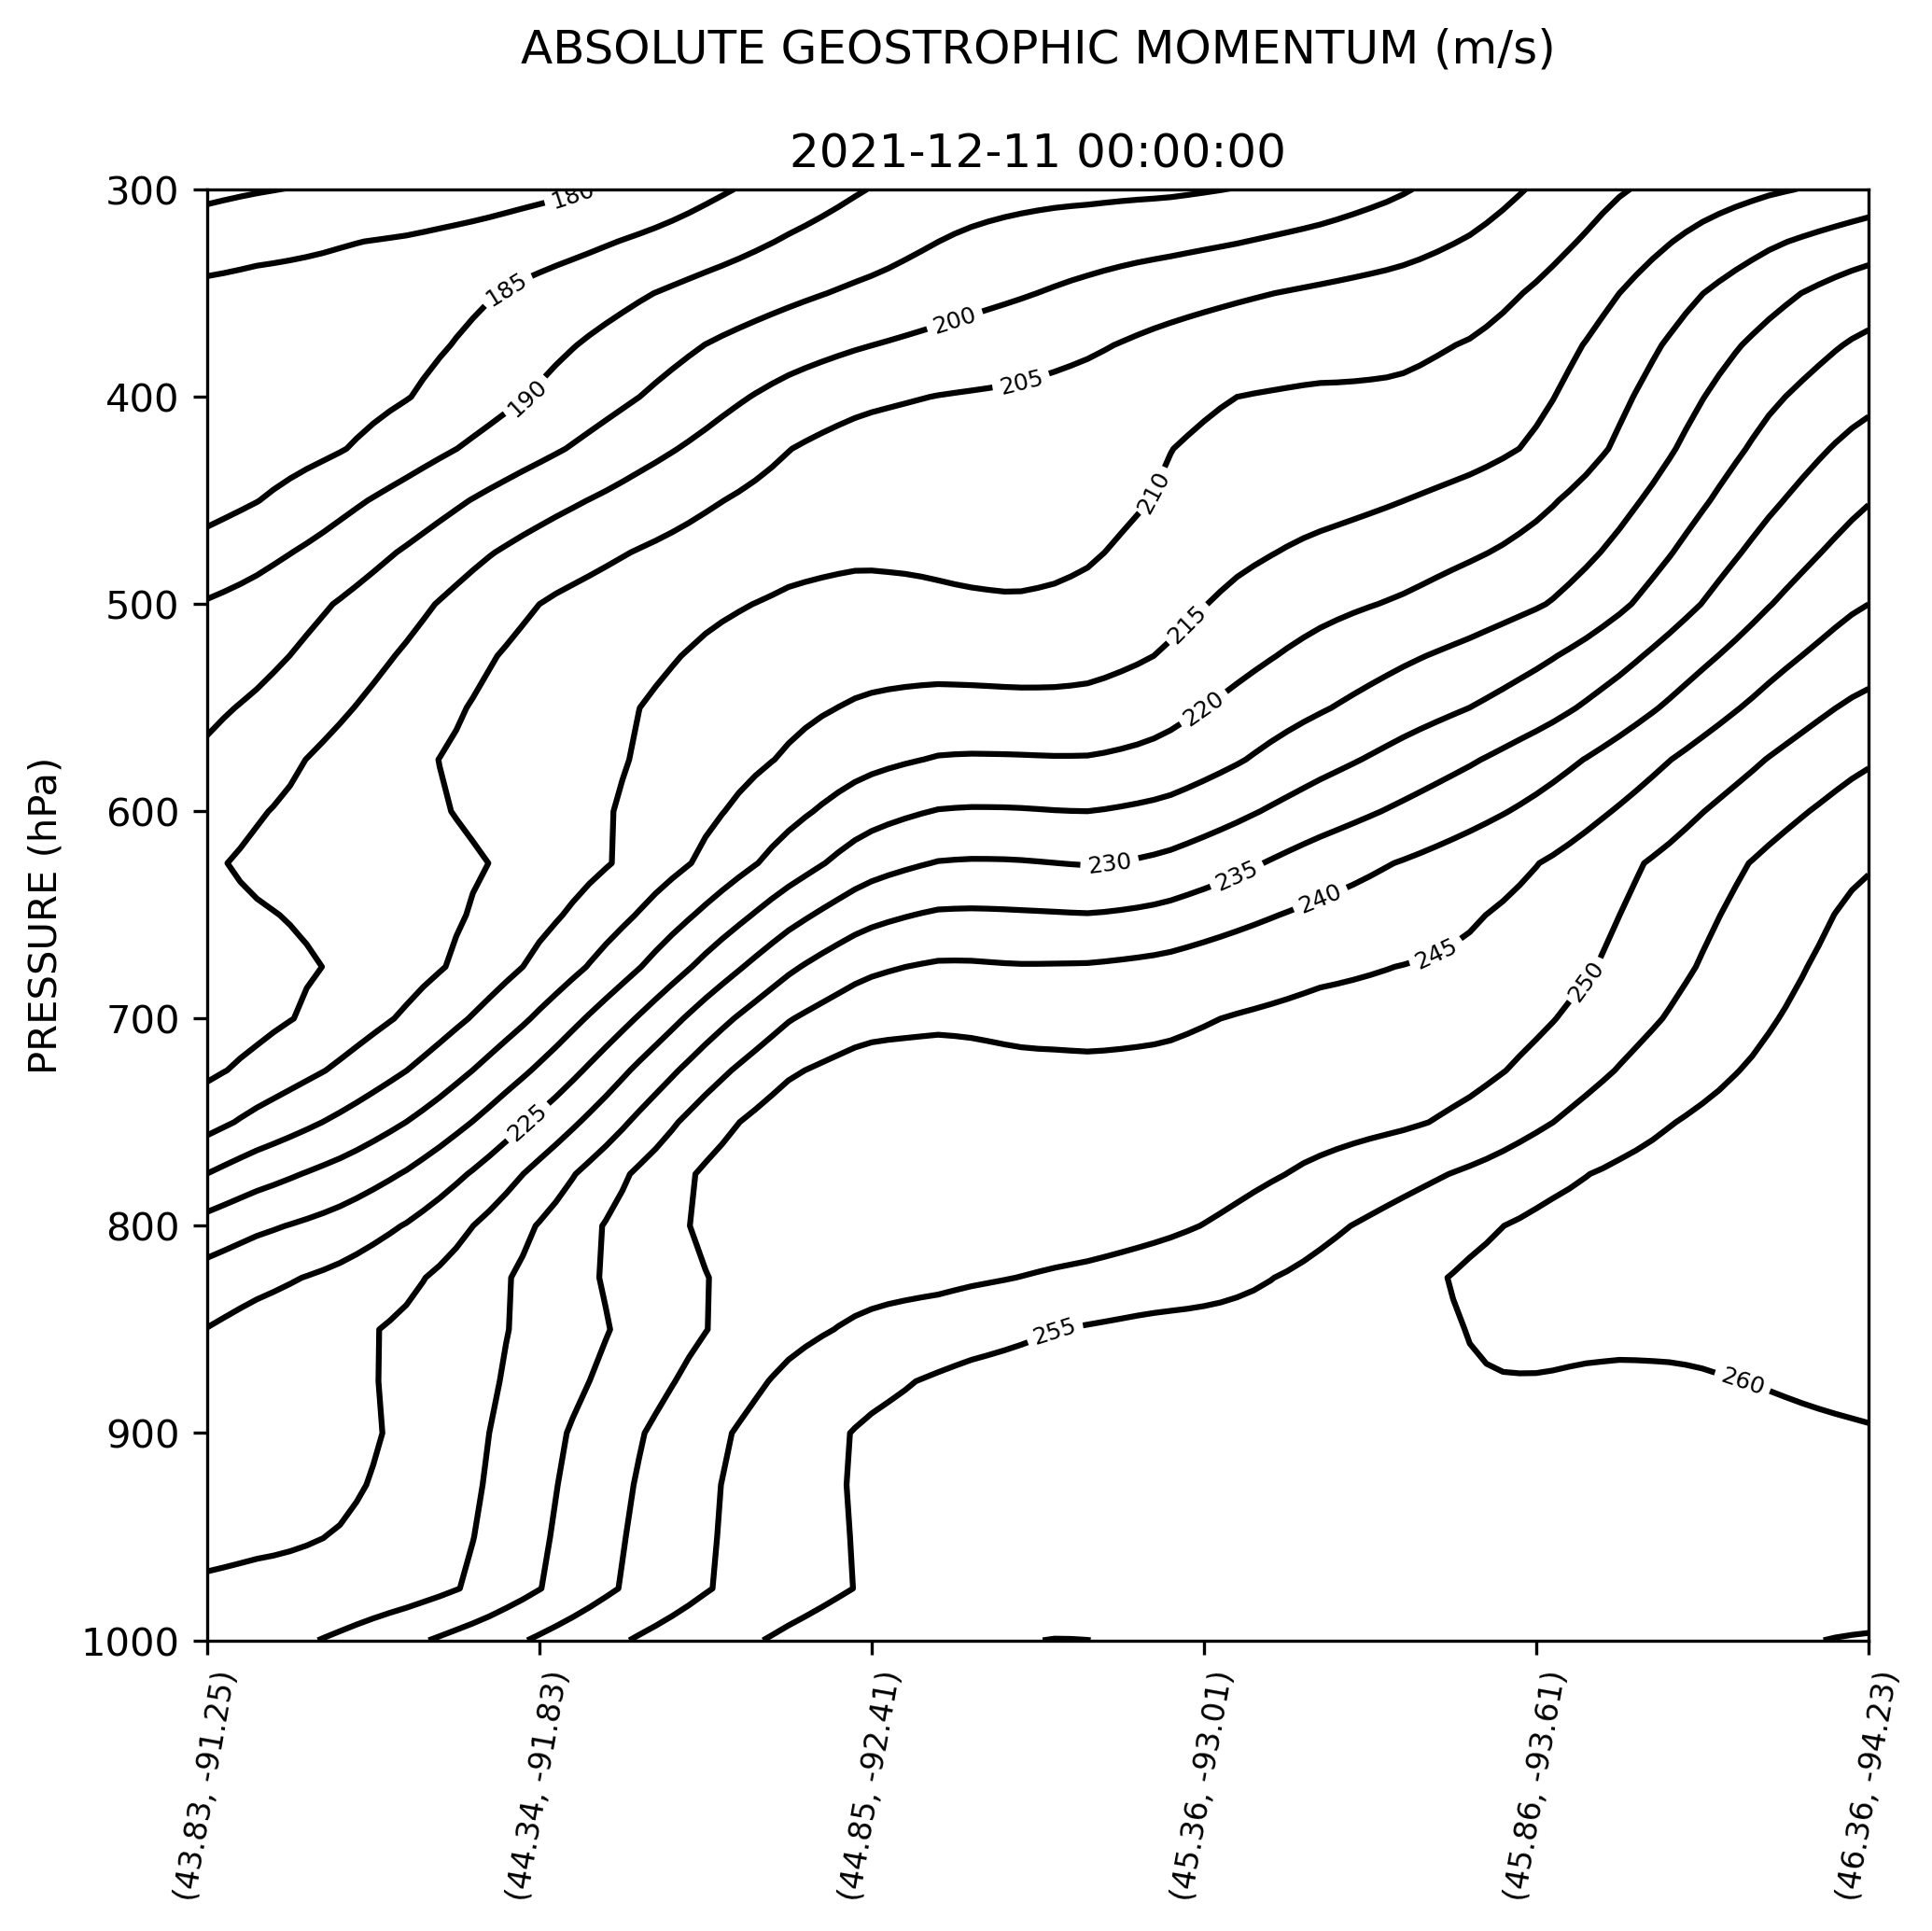

In [15]:
fig = plt.figure(figsize=(7,7),dpi=300)
ax = fig.add_subplot(1,1,1)


cf = plt.contour(Mg[0].index,Mg[0].isobaric/100,Mg[0],np.arange(150,300,5),linestyles='-',colors='k')
plt.ylim([1000,300])
plt.xlim([0,100])
plt.clabel(cf, fontsize=6, inline=1, rightside_up=True, use_clabeltext=True)

#ct = plt.contour(Mg[0].index,Mg[0].isobaric/100,theta_e_cs[:,0,:],np.arange(250,360,2),linestyles='--',colors='r')
#plt.clabel(ct, fontsize=6, inline=1, rightside_up=True, use_clabeltext=True)

labels = [int(item.get_text()) for item in ax.get_xticklabels()]
labels = [f"({lat_cs[i].values:0.2f}, {lon_cs[i].values:0.2f})" for i in labels]
ax.set_xticklabels(labels,rotation=80,fontsize=8)

plt.ylabel('PRESSURE (hPa)')
plt.title(f'ABSOLUTE GEOSTROPHIC MOMENTUM (m/s)'+f'\n\n{dt}')

fig.tight_layout()

plt.savefig(f'inertial_instability_{dt}.png',bbox_inches='tight')

/tmp/ipykernel_2487547/3444806201.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=80,fontsize=8)


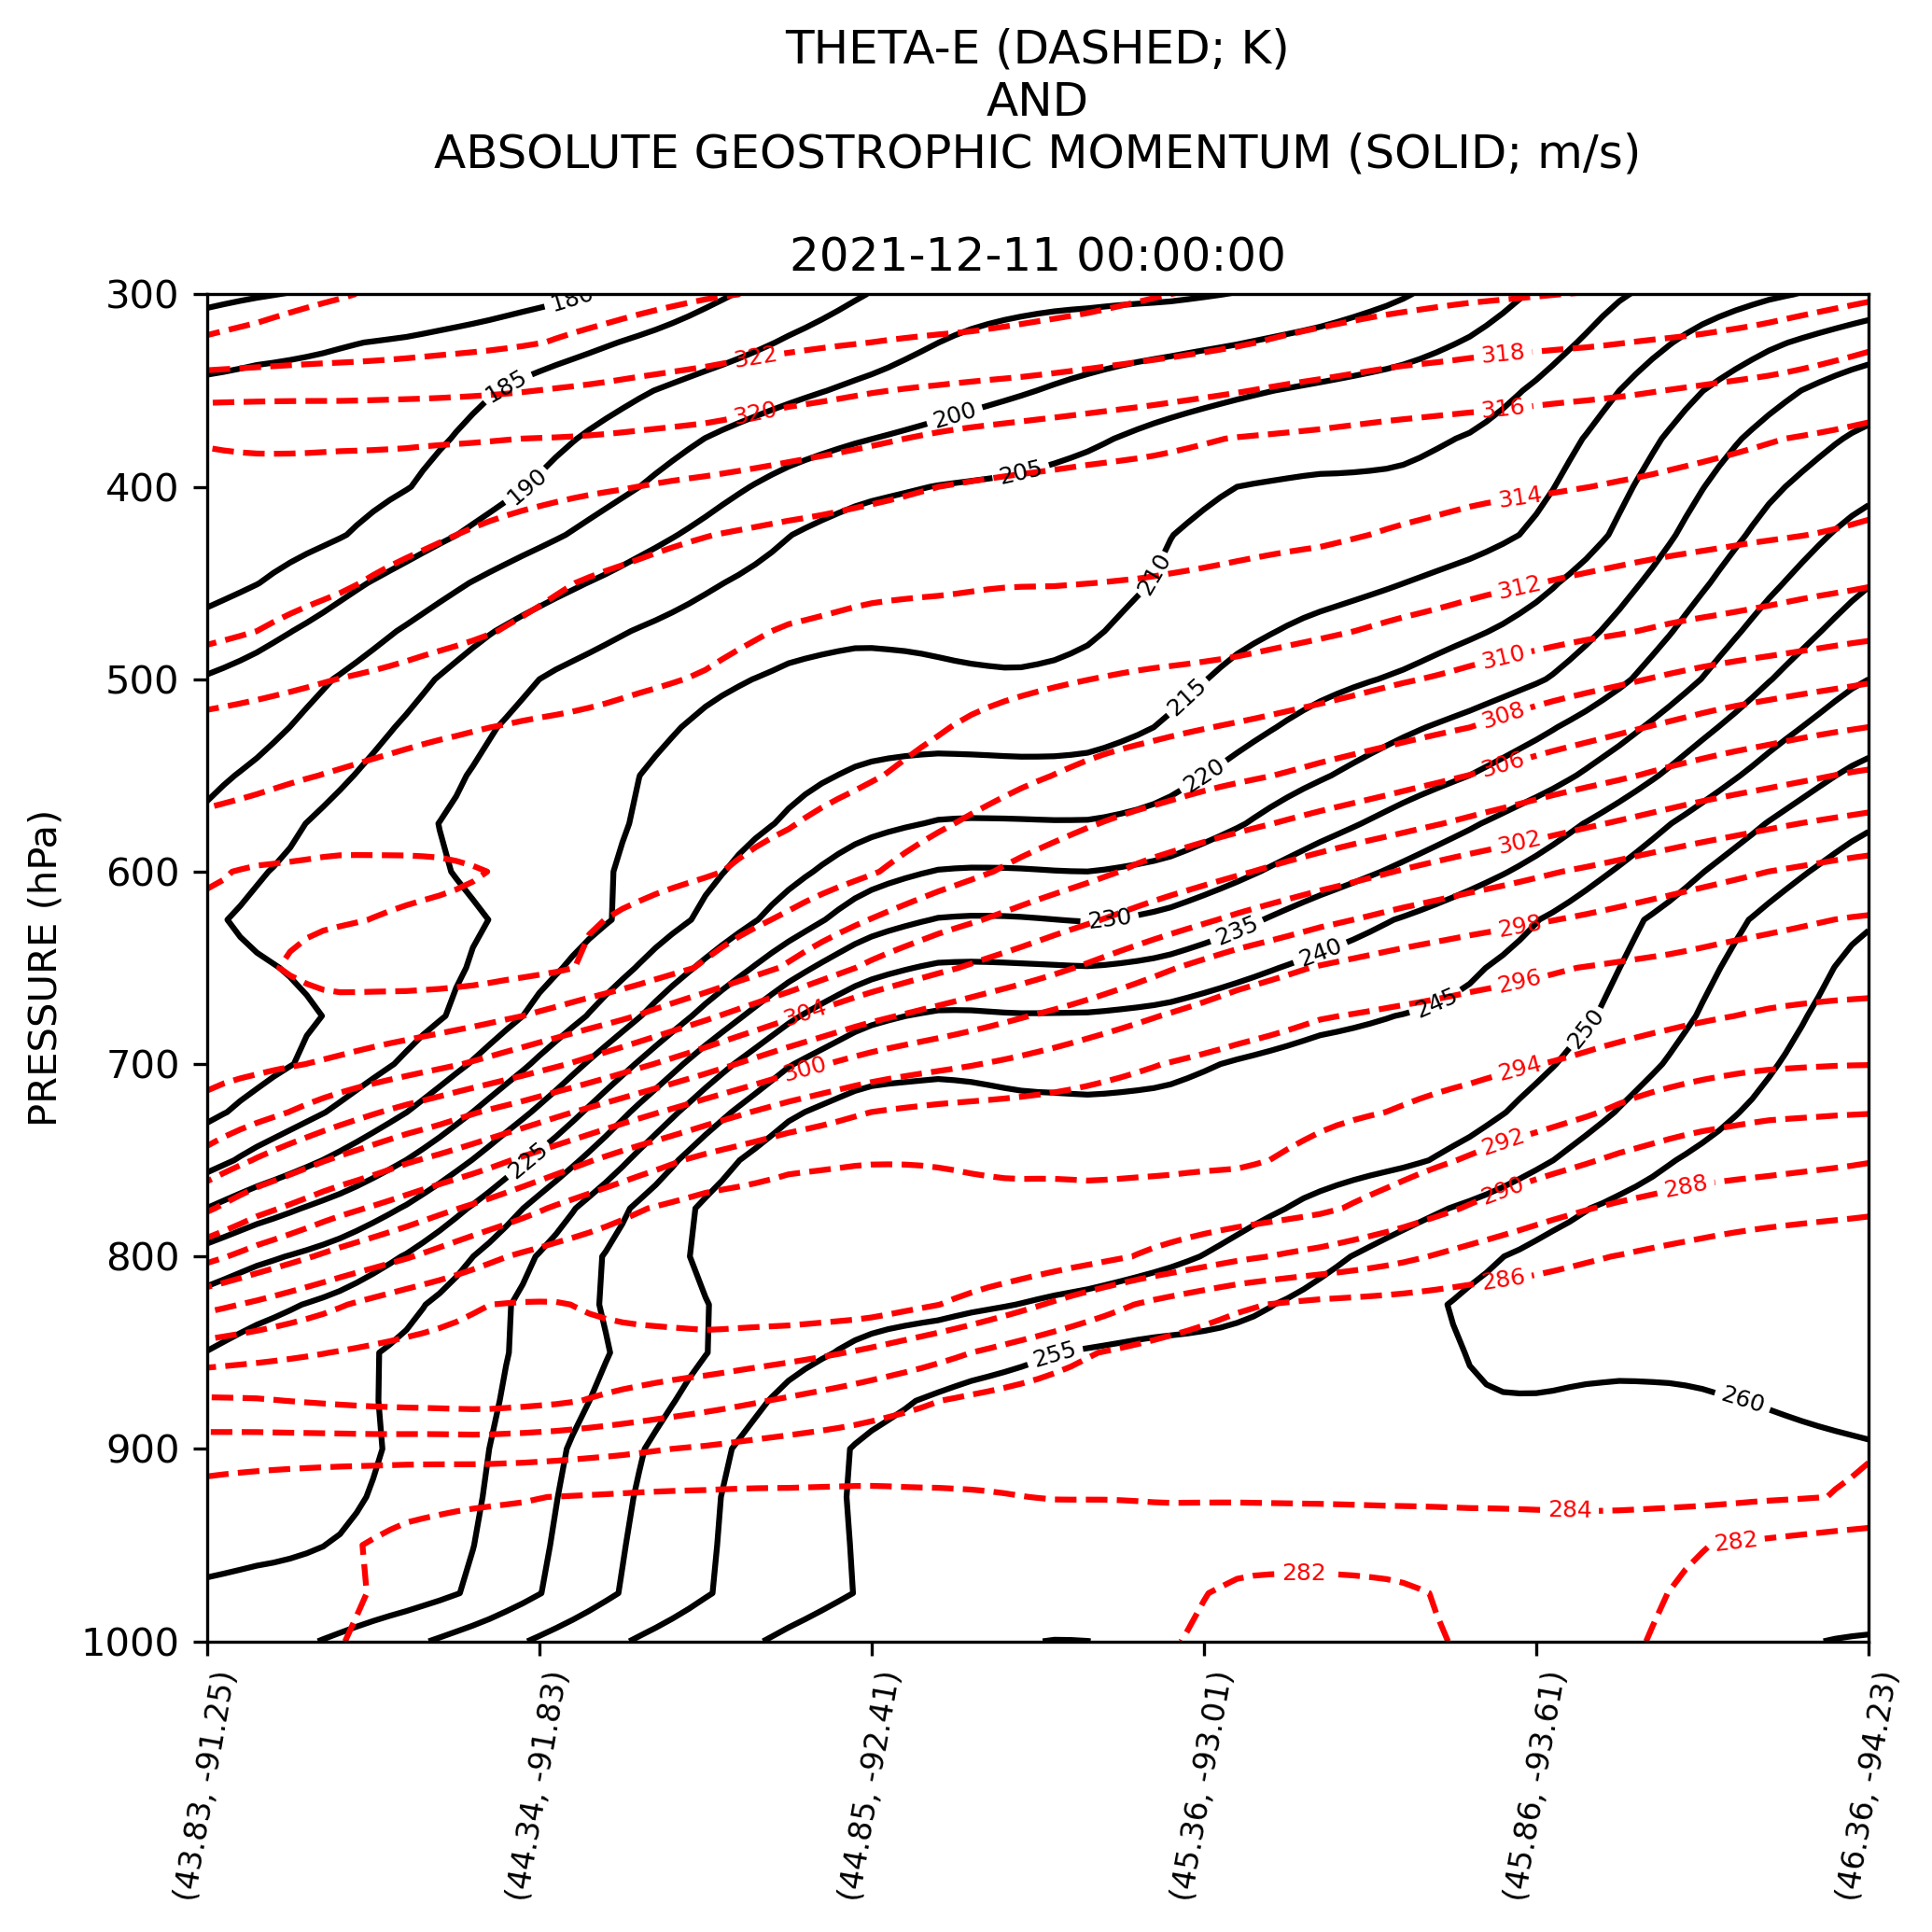

In [16]:
fig = plt.figure(figsize=(7,7),dpi=300)
ax = fig.add_subplot(1,1,1)


cf = plt.contour(Mg[0].index,Mg[0].isobaric/100,Mg[0],np.arange(150,300,5),linestyles='-',colors='k')
plt.ylim([1000,300])
plt.xlim([0,100])
plt.clabel(cf, fontsize=6, inline=1, rightside_up=True, use_clabeltext=True)

ct = plt.contour(Mg[0].index,Mg[0].isobaric/100,theta_e_cs[:,0,:],np.arange(250,360,2),linestyles='--',colors='r')
plt.clabel(ct, fontsize=6, inline=1, rightside_up=True, use_clabeltext=True)

labels = [int(item.get_text()) for item in ax.get_xticklabels()]
labels = [f"({lat_cs[i].values:0.2f}, {lon_cs[i].values:0.2f})" for i in labels]
ax.set_xticklabels(labels,rotation=80,fontsize=8)

plt.ylabel('PRESSURE (hPa)')
plt.title(f'THETA-E (DASHED; K)\nAND\nABSOLUTE GEOSTROPHIC MOMENTUM (SOLID; m/s)'+f'\n\n{dt}')

fig.tight_layout()

plt.savefig(f'CSI_{dt}.png',bbox_inches='tight')

/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/calc/tools.py:1064: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/xarray.py:460: UserWarning: Latitude and longitude computed on-demand, which may be an expensive operation. To avoid repeating this computation, assign these coordinates ahead of time with .metpy.assign_latitude_longitude().
  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/xarray.py:460: UserWarning: Latitude and longitude computed on-demand, which may be an expensive operation. To avoid repeating this computation, assign these coordinates ahead of time with .metpy.assign_latitude_longitude().
  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/pint/facets/plain/quantity.py:1119: RuntimeWarning: invalid value encountered in divide
  magnitude = magnitude_op(new_self

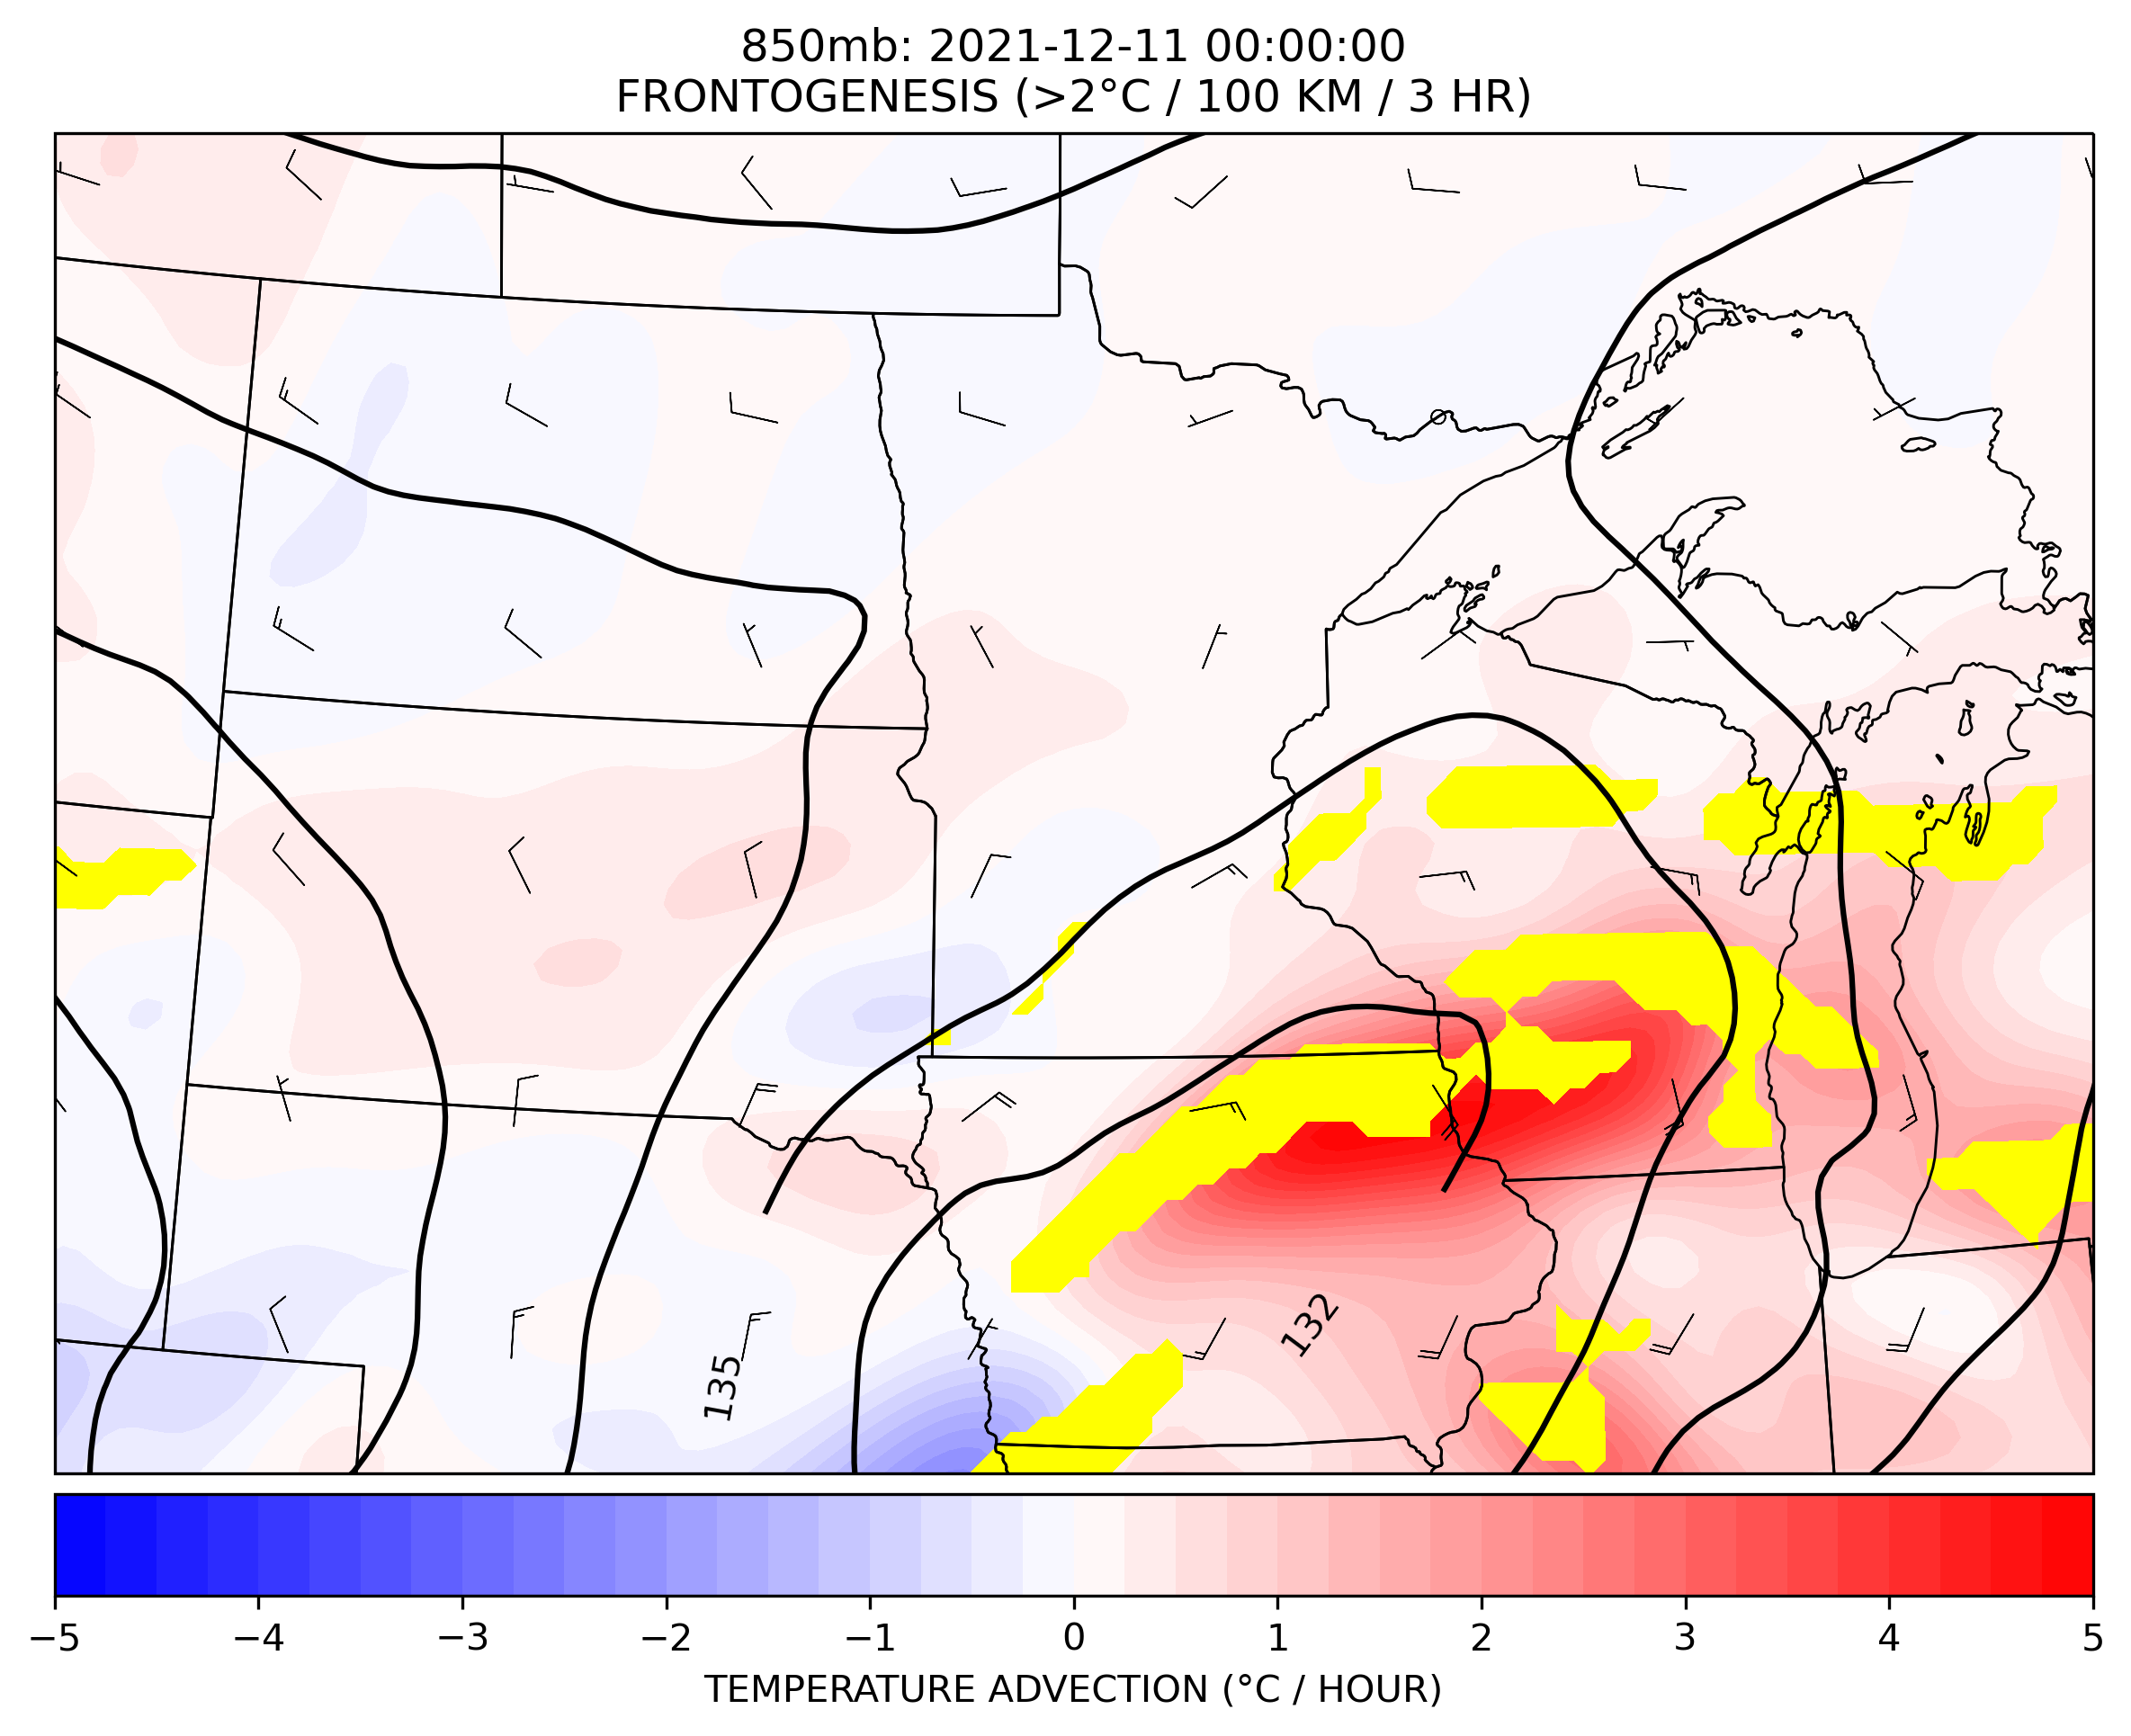

In [17]:
#850mb Frontogenesis

# Calculate temperature advection using metpy function
dx, dy = mpcalc.lat_lon_grid_deltas(ds.lon, ds.lat)
adv = mpcalc.advection(temp_850,u_850,v_850,
                       latitude=ds.lat,longitude=ds.lon,crs=ccrs.PlateCarree())

fgen = mpcalc.frontogenesis(temp_850,u_850,v_850,
                       latitude=ds.lat,longitude=ds.lon,crs=ccrs.PlateCarree())


adv = gaussian_filter(adv, sigma=3, order=0) * units('K/sec')
fgen = gaussian_filter(fgen, sigma=1, order=0) * units('K/m/sec')

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("temps_850",colors,N=80)

proj = ccrs.LambertConformal(central_longitude=-95,central_latitude=35,standard_parallels=[35])

fig = plt.figure(figsize=(8,8),dpi=300)
ax = fig.add_subplot(1,1,1,projection=proj)
cadv = ax.contourf(ds.lon,ds.lat,adv.to(units('delta_degC/hour')),
                   np.arange(-5,5.25,0.25),cmap='bwr',transform=ccrs.PlateCarree())

cbar = fig.colorbar(cadv,location="bottom",ticks=np.arange(-5,6,1),pad=0.01)
cbar.set_label('TEMPERATURE ADVECTION ('+u'\xb0'+'C / HOUR)')




fgen = fgen.to(units('delta_degC/km/hour'))*3*100
fgen[fgen.magnitude<2.0]=np.nan
cfgen = ax.contourf(ds.lon,ds.lat,fgen,colors='yellow',transform=ccrs.PlateCarree())


cs = ax.contour(ds.lon,ds.lat,hght_850,
                   np.arange(0,8000,30),colors='black',transform=ccrs.PlateCarree())
plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, 
           fmt=lambda x: f'{x:.0f}'[:3], rightside_up=True, use_clabeltext=True)

wind_slice = (slice(None,None,15),slice(None,None,15))
wb = ax.barbs(lon[wind_slice].values,lat[wind_slice].values,u_850[wind_slice].values,v_850[wind_slice].values,
            length=5,lw=0.4,pivot='middle',color='black',transform=ccrs.PlateCarree())



ax.add_feature(cfeature.STATES,edgecolor='k',linewidth=0.7)
ax.add_feature(cfeature.COASTLINE,edgecolor='k',linewidth=1.0)
ax.set_extent((lon_min,lon_max,lat_min,lat_max))

fig.tight_layout()

plt.title(f'850mb: {dt}\n' + 'FRONTOGENESIS (>2'+u'\xb0'+'C / 100 KM / 3 HR)')
plt.savefig(f'850mb_fgen_{dt}.png',bbox_inches='tight')

/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/calc/tools.py:1064: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/xarray.py:460: UserWarning: Latitude and longitude computed on-demand, which may be an expensive operation. To avoid repeating this computation, assign these coordinates ahead of time with .metpy.assign_latitude_longitude().
  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/metpy/xarray.py:460: UserWarning: Latitude and longitude computed on-demand, which may be an expensive operation. To avoid repeating this computation, assign these coordinates ahead of time with .metpy.assign_latitude_longitude().
  warnings.warn(
/research/modules/mpich/miniconda3/lib/python3.9/site-packages/pint/facets/plain/quantity.py:1119: RuntimeWarning: invalid value encountered in divide
  magnitude = magnitude_op(new_self

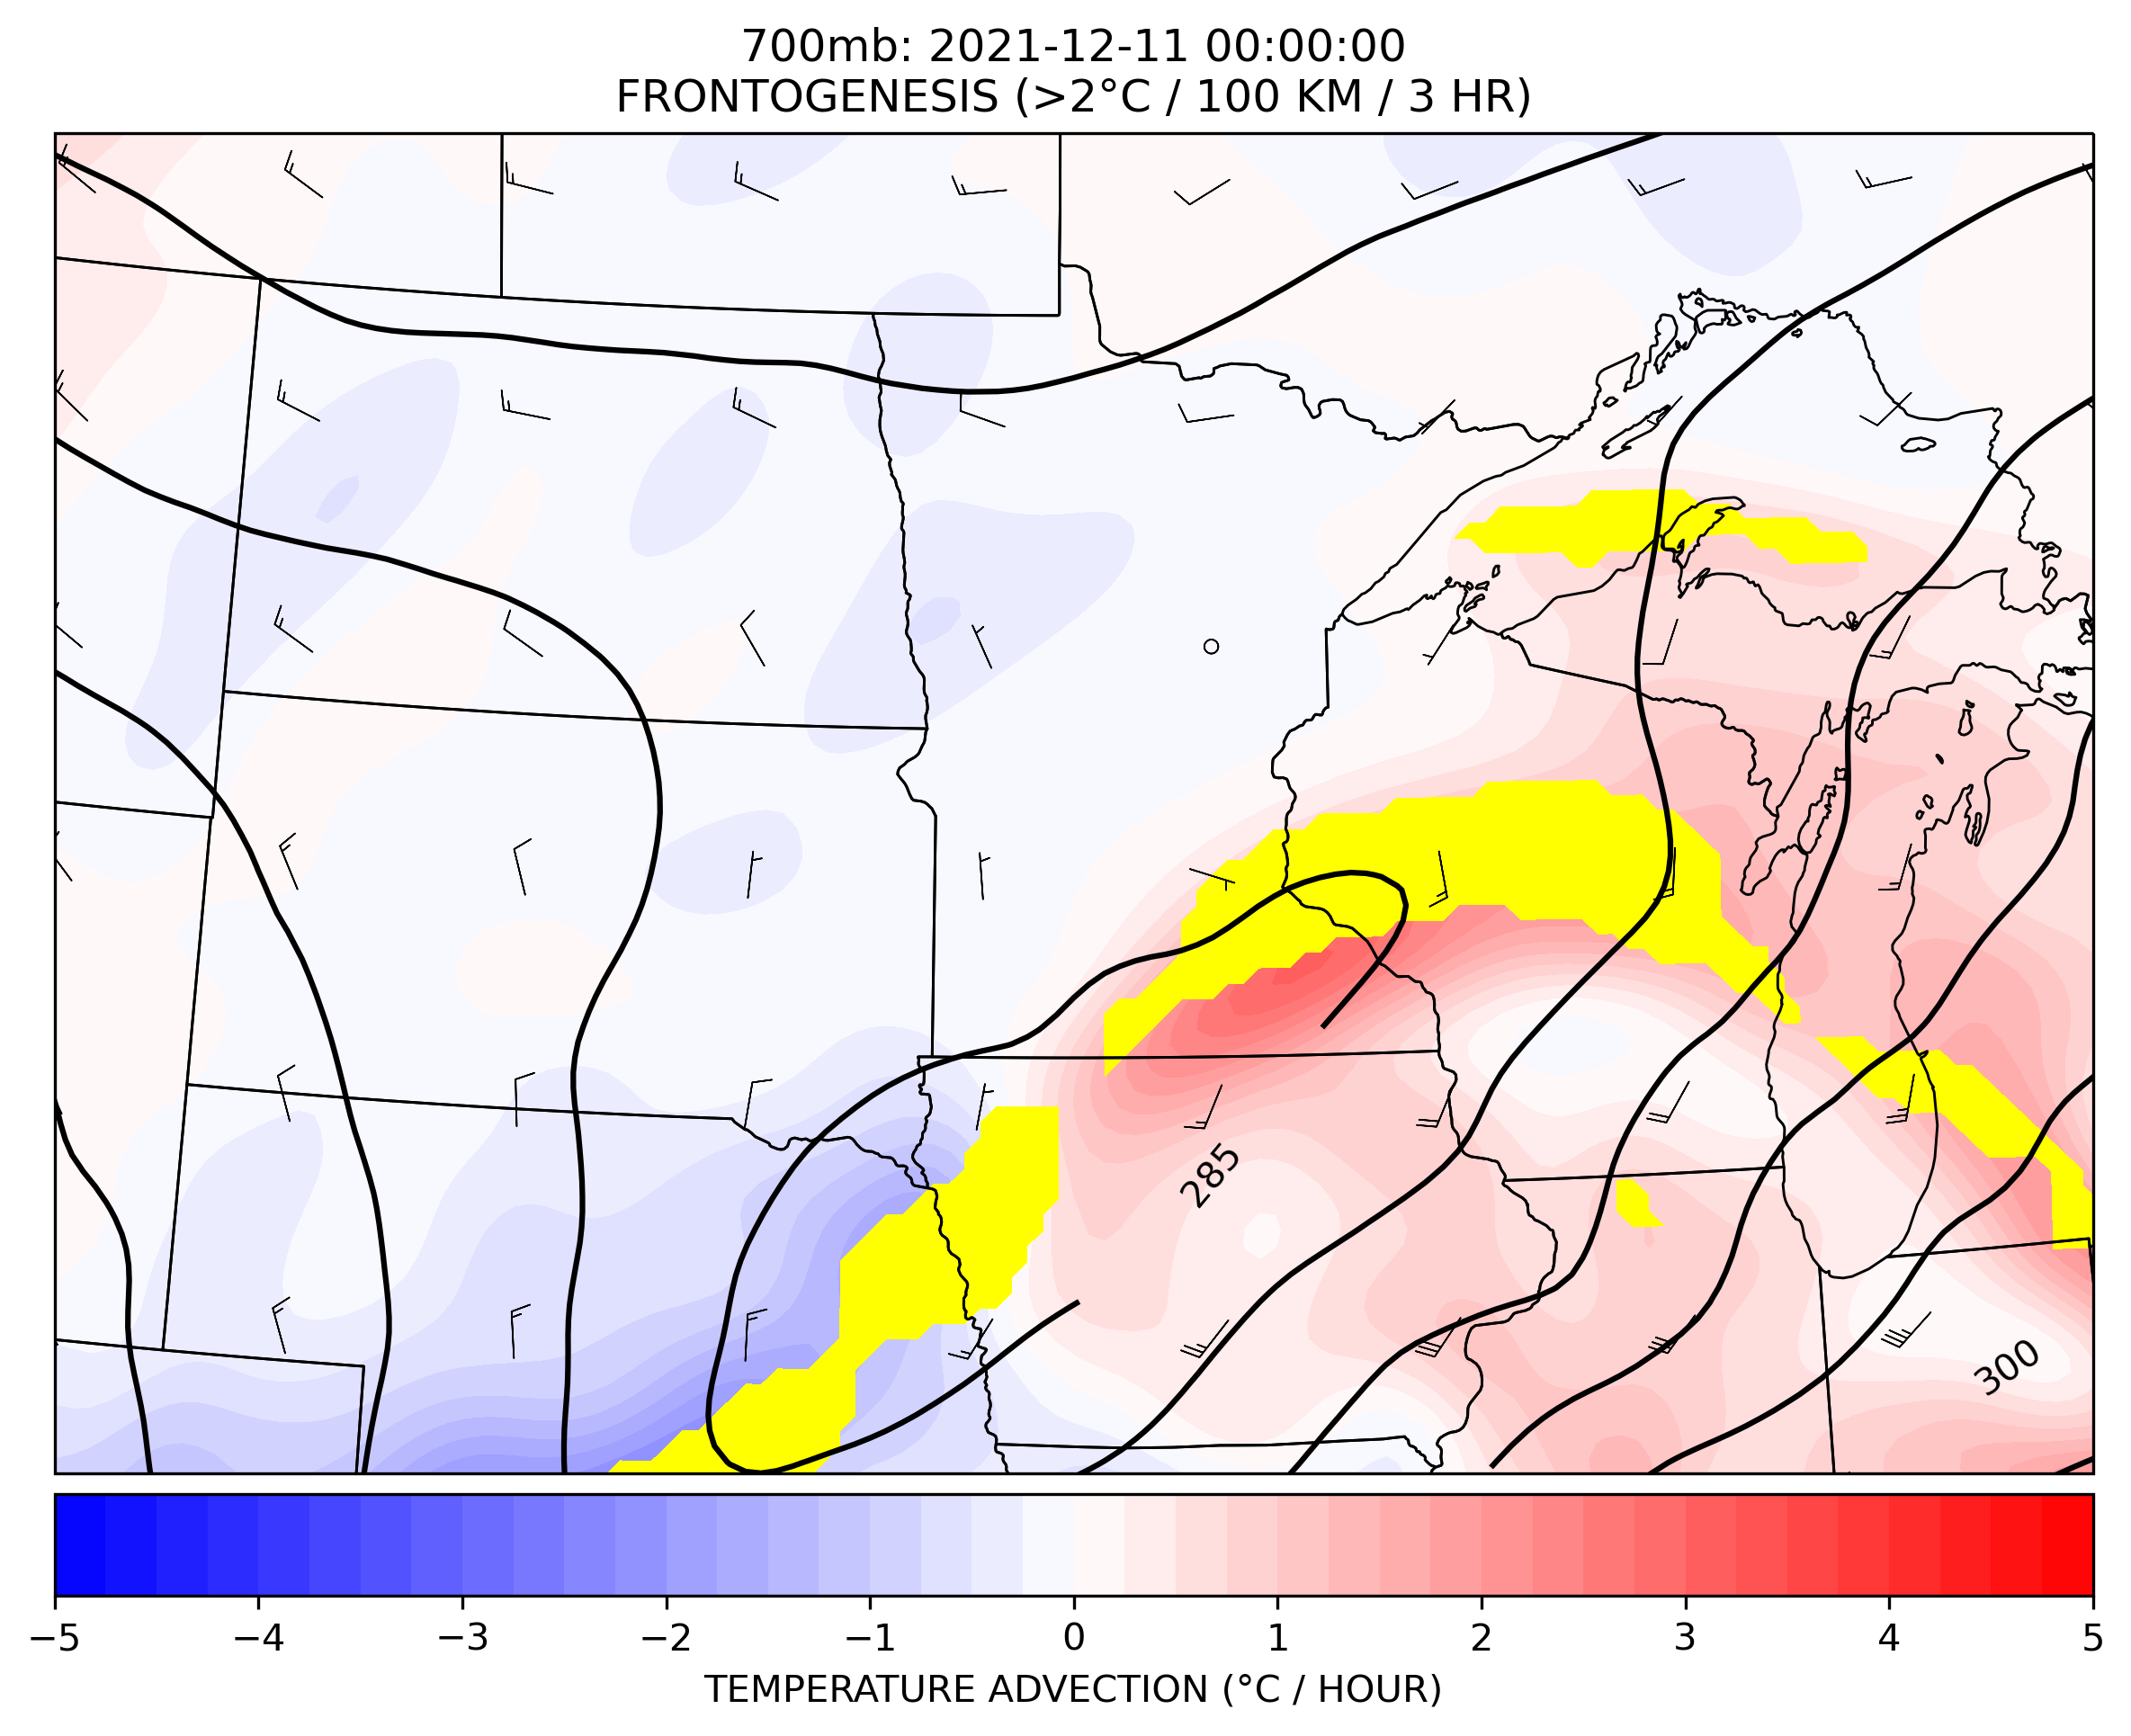

In [18]:
#850mb Frontogenesis

# Calculate temperature advection using metpy function
dx, dy = mpcalc.lat_lon_grid_deltas(ds.lon, ds.lat)
adv = mpcalc.advection(temp_700,u_700,v_700,
                       latitude=ds.lat,longitude=ds.lon,crs=ccrs.PlateCarree())

fgen = mpcalc.frontogenesis(temp_700,u_700,v_700,
                       latitude=ds.lat,longitude=ds.lon,crs=ccrs.PlateCarree())


adv = gaussian_filter(adv, sigma=3, order=0) * units('K/sec')
fgen = gaussian_filter(fgen, sigma=1, order=0) * units('K/m/sec')

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("temps_850",colors,N=80)

proj = ccrs.LambertConformal(central_longitude=-95,central_latitude=35,standard_parallels=[35])

fig = plt.figure(figsize=(8,8),dpi=300)
ax = fig.add_subplot(1,1,1,projection=proj)
cadv = ax.contourf(ds.lon,ds.lat,adv.to(units('delta_degC/hour')),
                   np.arange(-5,5.25,0.25),cmap='bwr',transform=ccrs.PlateCarree())

cbar = fig.colorbar(cadv,location="bottom",ticks=np.arange(-5,6,1),pad=0.01)
cbar.set_label('TEMPERATURE ADVECTION ('+u'\xb0'+'C / HOUR)')




fgen = fgen.to(units('delta_degC/km/hour'))*3*100
fgen[fgen.magnitude<2.0]=np.nan
cfgen = ax.contourf(ds.lon,ds.lat,fgen,colors='yellow',transform=ccrs.PlateCarree())


cs = ax.contour(ds.lon,ds.lat,hght_700,
                   np.arange(0,8000,30),colors='black',transform=ccrs.PlateCarree())
plt.clabel(cs, fontsize=10, inline=1, inline_spacing=10, 
           fmt=lambda x: f'{x:.0f}'[:3], rightside_up=True, use_clabeltext=True)

wind_slice = (slice(None,None,15),slice(None,None,15))
wb = ax.barbs(lon[wind_slice].values,lat[wind_slice].values,u_700[wind_slice].values,v_700[wind_slice].values,
            length=5,lw=0.4,pivot='middle',color='black',transform=ccrs.PlateCarree())



ax.add_feature(cfeature.STATES,edgecolor='k',linewidth=0.7)
ax.add_feature(cfeature.COASTLINE,edgecolor='k',linewidth=1.0)
ax.set_extent((lon_min,lon_max,lat_min,lat_max))

fig.tight_layout()

plt.title(f'700mb: {dt}\n' + 'FRONTOGENESIS (>2'+u'\xb0'+'C / 100 KM / 3 HR)')
plt.savefig(f'700mb_fgen_{dt}.png',bbox_inches='tight')